# Sparse Hebbian Learning : testing two different learning rates strategies

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)
from copy import deepcopy

In [3]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico']#, 'rec_error', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
tag = 'learning-rates'
shl = SHL()
data = shl.get_data(matname='data')

Extracting data..loading the data called : cache_dir/data_data
Data is of shape : (65520, 196) - done in 0.05s.


## fixed learning rate

loading the dico called : cache_dir/learning-rates_fixed_dico.pkl


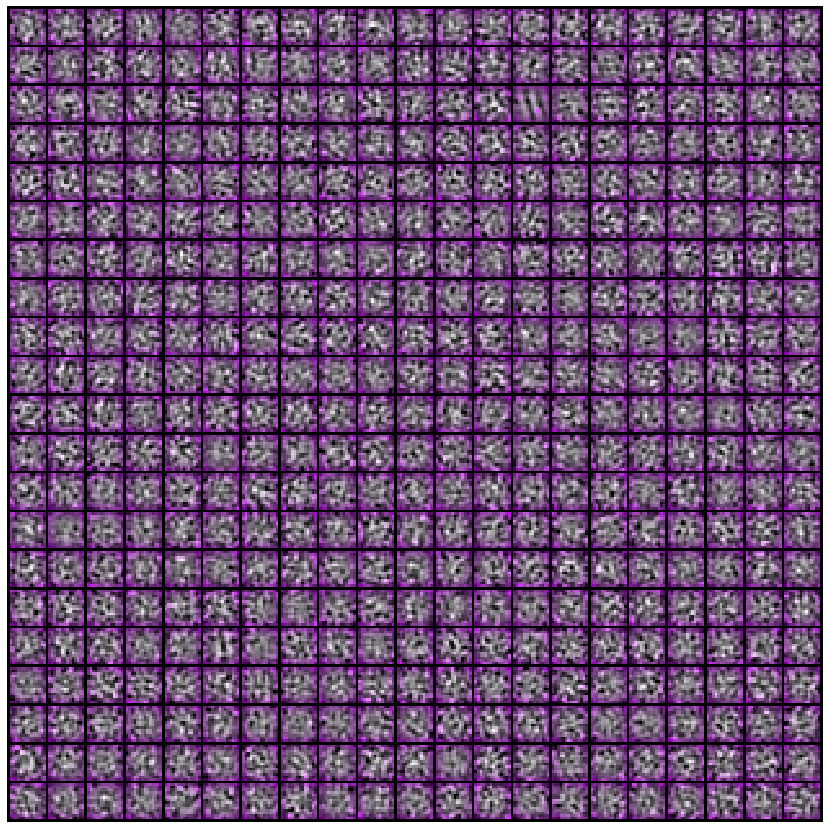

In [4]:
matname = tag + '_fixed'
shl = SHL(eta=0.01, beta1=0.)
dico_fixed = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

In [ ]:
from shl_scripts.shl_experiments import SHL_set
opts = dict(beta1=0., verbose=0)
experiments = SHL_set(opts, tag=matname)

list_figures = []
list_figures = ['show_dico']


display_variables = ['error', 'logL', 'cputime']
display_variables = ['error', 'logL', 'perror', 'MC', 'cputime']
display_variables = ['F']

for variable in ['eta']:
    experiments.scan(variable=variable, list_figures=list_figures, display='')
    plt.show()

    for display_variable in display_variables:
        fig, ax = experiments.scan(variable=variable, list_figures=[], display='dynamic', display_variable=display_variable)
        plt.show()

    for display_variable in display_variables:
        fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', display_variable=display_variable)
        plt.show()

## ADAM

See https://arxiv.org/pdf/1412.6980.pdf

In [ ]:
matname = tag + '_ADAM'
shl = SHL(beta1=.9, beta2=.999, epsilon=1.e-8)
dico_adam = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

In [ ]:
for variable in ['error', 'logL', 'F']:
    fig_error, ax_error = None, None
    fig_error, ax_error = shl.time_plot(dico_fixed, variable=variable, fig=fig_error, ax=ax_error, color='blue', label='fixed')
    fig_error, ax_error = shl.time_plot(dico_adam, variable=variable, fig=fig_error, ax=ax_error, color='red', label='adam')
    #ax_error.set_ylim((0, .65))
    ax_error.legend(loc='best')
    plt.show();

In [ ]:
from shl_scripts.shl_experiments import SHL_set
opts = dict(beta1=.9, beta2=.999, epsilon=1.e-8, verbose=0)
experiments = SHL_set(opts, tag=matname)

list_figures = []
list_figures = ['show_dico']


display_variables = ['error', 'logL', 'cputime']
display_variables = ['error', 'logL', 'perror', 'MC', 'cputime']
display_variables = ['F']

for variable in ['eta', 'beta1', 'beta2', 'epsilon']:
    experiments.scan(variable=variable, list_figures=list_figures, display='')
    plt.show()

    for display_variable in display_variables:
        fig, ax = experiments.scan(variable=variable, list_figures=[], display='dynamic', display_variable=display_variable)
        plt.show()

    for display_variable in display_variables:
        fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', display_variable=display_variable)
        plt.show()

## Version used

In [ ]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas